# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: How many bikes are being used everyday?
           Do we see increase or decrease of bike sharing based on season? 

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
import matplotlib.pyplot as plt    # use to generate histrogram and bar charts
import numpy as np #use to x-axis co-ordinates
import calendar # used to genarate days of week

In [36]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [37]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functio
    ns.html
    """
    
    if city in ('NYC','Chicago'):
        time_in_mints = float(datum['tripduration']) / 60
    else :
        time_in_mints = float(datum['Duration (ms)']) * 0.0000166667

    return time_in_mints


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
   assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [40]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    if city in 'Washington':
        city_bike_dtls = datetime.strptime(datum['End date'], '%m/%d/%Y %H:%M')
    if city in 'NYC':
        city_bike_dtls = datetime.strptime(datum['stoptime'], '%m/%d/%Y %H:%M:%S')
    if city in 'Chicago':
        city_bike_dtls = datetime.strptime(datum['stoptime'], '%m/%d/%Y %H:%M')
    
    month = int(city_bike_dtls.strftime('%-m'))
    hour = int(city_bike_dtls.strftime('%-H'))
    day_of_week = city_bike_dtls.strftime('%A')
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 23, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [41]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    if city in ('Chicago','NYC'):
        user_type = datum['usertype']
    else :
      if datum['Member Type'] == 'Registered':
         user_type = 'Subscriber'
      if datum['Member Type'] == 'Casual':  
         user_type = 'Customer'
    return str(user_type)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [42]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            
            new_point = {}
            new_point['duration'] = duration_in_mins(row, city)
            month, hour, day_of_week = time_of_trip(row, city)
            new_point['month'] = month
            new_point['hour'] = hour
            new_point['day_of_week'] = day_of_week
            new_point['user_type'] = type_of_user(row, city)
            trip_writer.writerow(new_point)

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            
            

In [43]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123130912900001'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: New York has highest number of trips with highest propotion of trips  made by  subscribers. Whereas Chicago has highest proportion of trips made by short-term customers 

In [2]:
def cal_proportion(partial, total):
    """
    This function calculates percentage. 
    partial : number to converted to percent
    total : whole values
    """
    return 100 * float(partial) / float(total)
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types based on user type
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        # return tallies as a tuple
        return (n_total, n_subscribers, n_customers)

In [45]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##
city_data_file = {'Washington':  './data/Washington-2016-Summary.csv',
                  'Chicago':'./data/Chicago-2016-Summary.csv',
                  'NYC': './data/NYC-2016-Summary.csv'}

for city, filename in city_data_file.items():
      trip_info = ()
      trip_info = number_of_trips(filename)
      #provide details in string format
      print('City: {} '.format(city))
      print('Total trips: {} % Trips by Subscriber : {}  by Customers: {}'.format(trip_info[0],cal_proportion(trip_info[1], trip_info[0]),cal_proportion(trip_info[2], trip_info[0])))                                                                         

City: Washington 
Total trips: 66326 % Trips by Subscriber : 78.0282242257938  by Customers: 21.971775774206193
City: Chicago 
Total trips: 72131 % Trips by Subscriber : 76.22520136973007  by Customers: 23.774798630269924
City: NYC 
Total trips: 276798 % Trips by Subscriber : 88.83590199351151  by Customers: 11.164098006488485


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: Average trip length in Washington is  19 minutes with 10.8% of trips longer than 30 minutes. Similiarly in Chicago average trip is 17 minutes with 8.3% over 30 mintues and New York average trip is 16 minutes with 7.3% of trips are over 30 minutes approximatly. 

In [3]:
def cal_average(sumofall, countofall):
    """
    This function calculates average. 
    sumofall : addition  of all numbers
    countofall : count of  numbers
    """
    return  sumofall / countofall
def duration_of_trip(filename):
    """
    This function reads in a file with trip data and calculates the duration
    trips made by subscribers and customers.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize  variables
        sub_duration = 0
        cus_duration = 0
        total_duration = 0
        grt30_count = 0
        total_count = 0
        
        # Add up  all ride durations and also add up based on user type
        # tally up all ride and also rides with duration more than 30 mintues
        for row in reader:      
            total_duration += float(row['duration'])
            total_count += 1
            if row['user_type'] == 'Subscriber':
                    sub_duration += float(row['duration'])
            else:
                    cus_duration += float(row['duration'])
            if (float(row['duration']) > 30) :
                grt30_count += 1
        # return tallies as a tuple
        return (total_duration,total_count,grt30_count,sub_duration, cus_duration) 

In [51]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##
## the function on the cleaned data files you created from Question 3.      ##
city_data_file = {'Washington':  './data/Washington-2016-Summary.csv',
                  'Chicago':'./data/Chicago-2016-Summary.csv',
                  'NYC': './data/NYC-2016-Summary.csv',
                  'Bay Area': './examples/BayArea-Y3-Summary.csv'}

for city, filename in city_data_file.items():
    trip_info = ()
    trip_info = duration_of_trip(filename)
    print('City: {}'.format(city))    
    print('Average trip length:  {}  Propotion of trips longer than 30mints: {}%'. format(round(cal_average(trip_info[0],trip_info[1]),2),round(cal_proportion(trip_info[2], trip_info[1]),2)))     
 

City: Washington
Average trip length:  18.93  Propotion of trips longer than 30mints: 10.84%
City: Chicago
Average trip length:  16.56  Propotion of trips longer than 30mints: 8.33%
City: NYC
Average trip length:  15.81  Propotion of trips longer than 30mints: 7.3%
City: Bay Area
Average trip length:  14.04  Propotion of trips longer than 30mints: 3.52%


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: In all the 3 cities Washington, Chicago and New York the consumer takes longer trips than subscriber with average trip durations of 41.7 minutes, 31 minutes and 32.8 minutes respectively.

In [54]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

city_data_file = {'Washington':  './data/Washington-2016-Summary.csv',
                  'Chicago':'./data/Chicago-2016-Summary.csv',
                  'NYC': './data/NYC-2016-Summary.csv',
                  'Bay Area': './examples/BayArea-Y3-Summary.csv'}

for city, filename in city_data_file.items():
    #obtain total trips and count of different trip types
    trip_count = number_of_trips(filename)
    #obtain sum of trip duration for different trip types
    trip_duration = duration_of_trip(filename)
    #calculate average duration for Subscriber
    avg_subscriber = round(cal_average(trip_duration[3], trip_count[1]),2)
    #calculate average duration for Customer
    avg_customer = round(cal_average(trip_duration[4], trip_count[2]),2)
    print('City: {} Average long trip: subscriber {} consumer {}'.format(city, avg_subscriber, avg_customer)) 


City: Washington Average long trip: subscriber 12.53 consumer 41.68
City: Chicago Average long trip: subscriber 12.07 consumer 30.98
City: NYC Average long trip: subscriber 13.68 consumer 32.78
City: Bay Area Average long trip: subscriber 9.51 consumer 54.55


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

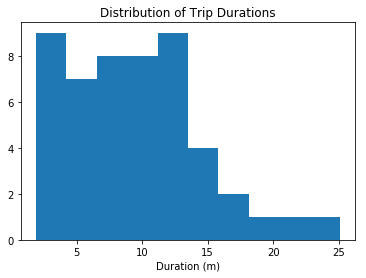

In [30]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [55]:
def collect_trip_time(filename, type):
    """
    This function reads in a file with trip data and makes list of trip times
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize  variables
        trip_times = []
        count = 0
        
        #  Obtain first 50 trip durations based on rider type 
        while count<50:
            get_trip = next(reader)
            if type in (get_trip['user_type'],'All'):
                    trip_times.append(round(float(get_trip['duration']), 2))
                    count += 1
    return trip_times

Washington


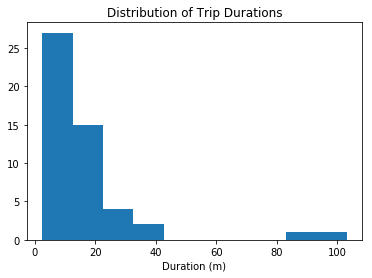

Chicago


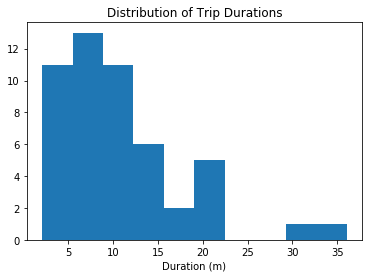

NYC


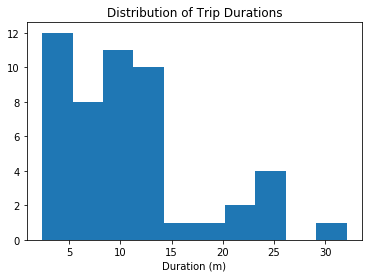

Bay Area


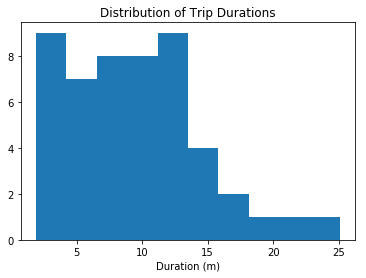

In [56]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

city_data_file = { 'Washington':  './data/Washington-2016-Summary.csv',
                   'Chicago':'./data/Chicago-2016-Summary.csv',
                   'NYC': './data/NYC-2016-Summary.csv',
                   'Bay Area': './examples/BayArea-Y3-Summary.csv'}

for city, filename in city_data_file.items():
    print(city)
    plt.hist(collect_trip_time(filename,'All'))
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration (m)')
    plt.show()
   

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: The Histrogram is plotted for 50 data points with duration less than 75 for each user type in Washington City. The Subscriber distribution peaked before between 0 to 9 minutes and customers distribution peaked between 8 to 15 minutes. Both the distributions are skewed to left in Washington City predicting that bikes are used regulary for short distance that could be reached in less than 20 minutes. We do see a second closer peak for customer between 22 and 30 minutes duration. From Histrogram it can be assumed that a bike borrowed by Subscriber is sured to be returned in less than 30 minutes whereas bike borrowed by Customer might exceed 30 minutes limit. Other 2 cities NYC and Chicago have similiar distribution with Subscriber bike usage peaking betwwen 10 to 15 minutes and Customer bike usage between 15 and 25 mintues. Overall Subscribers is more predictable whereas Customer bike duration is more than 15 minutes  often exceeding 30 minutes.

Washington


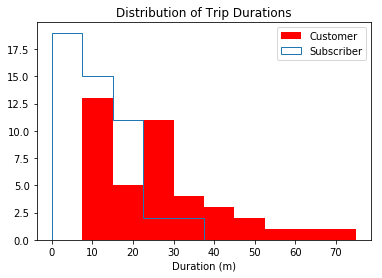

Chicago


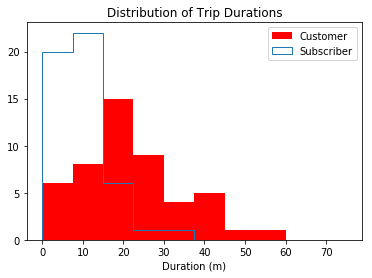

NYC


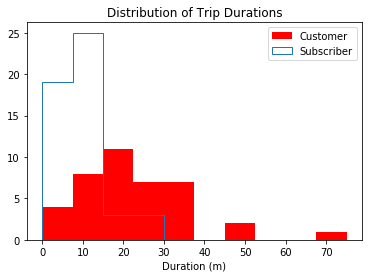

Bay Area


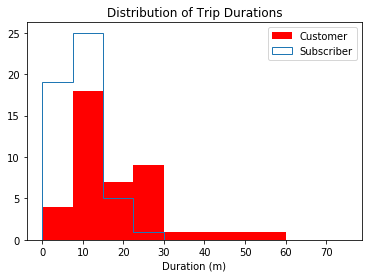

In [57]:
## Use this and additional cells to answer Question 5. ##
city_data_file = { 'Washington':  './data/Washington-2016-Summary.csv',
                   'Chicago':'./data/Chicago-2016-Summary.csv',
                   'NYC': './data/NYC-2016-Summary.csv',
                   'Bay Area': './examples/BayArea-Y3-Summary.csv'}

for city, filename in city_data_file.items():
    print(city)
    #plot customer data points and set color to red
    plt.hist(collect_trip_time(filename,'Customer'),bins=10,range=(0,75),color='r', label='Customer')
    #plot subscriber data points and outline portion of area without color filling
    plt.hist(collect_trip_time(filename,'Subscriber'),bins=10,range=(0,75),histtype='step', label='Subscriber')
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration (m)')
    plt.legend()
    plt.show()


In [ ]:
<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: The statustics performed on data can be used to answer questions like 
 On what day of week Subscriber/ Customer most likely to use
the system ? On the other hand ,  On what day of week Subscriber/ Customer  use the system less compared to other day? 
Does ridership differ on weekdays versus weekends?
Does duration of trip is effected on days when system is most used ?
At what part of day the system is used the most by Subscriber/ Customer? Does it differ weekdays vs weekends?


The statistics are calculated across the cities

For Washington City the system is most likely used on Wednesdays by subscribers and Saturday by Customers. Whereas  on Sunday for subscribers and 
Tuesday for Customers the system has low ridership. It can be observed that Subscriber use the system  on weekdays compared to weekends but Customers have more ridership on 
weekends and Friday compared to rest of week. It can be said that subscribers are regular employees who commute to work on weekdays and Customers are preferably tourists.
Looking more into numbers of system usage Subscriber  ridership is high(33%) during morning hours between 5 A.M to 10 A.M and evenings(38%) between
 4 P.M to 8 P.M. These timings are commute hours of employees to office where they usually work from 9-5 PM. It can also be seen that ridership
 is low on weekends(17%) for same timings of subscriber. On other hand Customers ridership is high (55%) on weekends and weekdays between 10 A.M to 4 P.M.
Finally average duration of trip remains same weekends versus weekdays for each user type. Although there is no difference, the average duration of subscriber
is close to 13 minutes and 44 minutes for customer.


We see a similar trends in Chicago and NYC. The subscribers are most likely going to use the system in weekdays(Chicago - Tuesday and NYC Wednesday)
and Customers on weekend (Chicago - Sunday and NYC - Sunday ). Also the subscribers are less likely to use the system on weekends(Chicago - Sunday and NYC Sunday)
and Customers in weekday (Chicago - Wednesday and NYC - Tuesday ). The usage of system at different part of day follows a same pattern in all 3 cities.
The Subscriber ridership is high during morning(Chicago - 32% and NYC - 32% ) and evening(Chicago - 36% and NYC - 35% ) hours of day.  
Whereas Customers usage of system is high during midday(Chicago - 57% and NYC - 56% )  on weekdays and weekends. Another common trend among all 3 cities is 
that usage of system on Friday midday is slightly higher than evening hours for Subscribers. The average duration remains less than 15 minutes for Subscriber
and 30 to 45 minutes for Customer in all 3 cities.


In [4]:
def number_of_trips_ondays(filename, day_of_week, user_type):
    """
    This function reads in a file with trip data and reports the number of
    trips made by  subscribers and customers on each day of week  and also tallies trips at different part of day.
    """
    
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_count = 0
        sum_duration = 0
        morning_hours_usage = 0
        midday_hours_usage = 0
        evening_hours_usage = 0
        unusual_hours_usage = 0

        
        # tally up ride  based on week of day and rider type
        for row in reader:   
           if row['day_of_week'] == day_of_week and row['user_type'] == user_type:
                n_count += 1
                sum_duration += float(row['duration'])
                # tally up ride types based on time of day
                if 5<=int(row['hour'])<=10:
                    morning_hours_usage += 1 
                elif  10<int(row['hour'])<=16:
                    midday_hours_usage += 1
                elif  16<int(row['hour'])<=20:
                    evening_hours_usage += 1  
                else:
                    unusual_hours_usage += 1         
        #total usage of bike on a day
        total_usage = morning_hours_usage + midday_hours_usage + evening_hours_usage + unusual_hours_usage
        percent_usage = []
        #calculate propotion of usage 
        percent_usage.append(round(cal_proportion(morning_hours_usage,total_usage),2))
        percent_usage.append(round(cal_proportion(midday_hours_usage,total_usage),2))
        percent_usage.append(round(cal_proportion(evening_hours_usage,total_usage),2))
        percent_usage.append(round(cal_proportion(unusual_hours_usage,total_usage),2))
        # return tallies as a tuple
        return (n_count, round(cal_average(sum_duration,n_count),2) ,tuple(percent_usage))  

In [33]:
## In this cell data for each city is tallied 
city_data_file = {'Washington':  './data/Washington-2016-Summary.csv',
                  'Chicago':'./data/Chicago-2016-Summary.csv',
                  'NYC': './data/NYC-2016-Summary.csv',
                  'Bay Area': './examples/BayArea-Y3-Summary.csv'}

for city, filename in city_data_file.items():
    print('City: {}'.format(city)) 
    days_of_week_Subscriber = {}
    days_of_week_Customer = {}
   # Loop through each day of week to calculate various statistics for Subscriber and Customer
    for day in  calendar.day_name[0:8]  :
        days_of_week_Subscriber[day]= number_of_trips_ondays(filename,day,'Subscriber')
        days_of_week_Customer[day]= number_of_trips_ondays(filename,day,'Customer')
    print ('Subscriber')
    print ('              Day        Trip Count            Average Duration            %usage(morning/midday/evening/unusal)')
    for day in days_of_week_Subscriber.keys():
        trip_count, avg_duration, percent_of_usage =  days_of_week_Subscriber[day]
        #Obtain day of week with maximum and minimum rides for Subscriber
        if max(days_of_week_Subscriber.values()) == days_of_week_Subscriber[day]:
            day_of_max_rides = day
        elif   min(days_of_week_Subscriber.values()) == days_of_week_Subscriber[day]: 
            day_of_min_rides = day
        print ('      {}             {}                        {}                           {}'.format(day,trip_count,avg_duration,percent_of_usage))
    print ('Most likely use on {} less likely use on {}'.format(day_of_max_rides, day_of_min_rides))
    print ('Customer')
    for day in days_of_week_Customer.keys():
        trip_count, avg_duration, percent_of_usage =  days_of_week_Customer[day]
        #Obtain day of week with maximum and minimum rides for Customer
        if max(days_of_week_Customer.values()) == days_of_week_Customer[day]:
            day_of_max_rides = day
        elif   min(days_of_week_Customer.values()) == days_of_week_Customer[day]: 
            day_of_min_rides = day
        print ('      {}             {}                        {}                           {}'.format(day,trip_count,avg_duration,percent_of_usage))
    print ('Most likely use on {} less likely use on {}'.format(day_of_max_rides, day_of_min_rides))

 
        
        
        

City: Washington
Subscriber
              Day        Trip Count            Average Duration            %usage(morning/midday/evening/unusal)
      Monday             7652                        12.21                           (30.38, 23.56, 38.57, 7.49)
      Tuesday             8317                        12.05                           (33.25, 21.01, 37.61, 8.14)
      Wednesday             8520                        12.72                           (33.09, 21.21, 37.38, 8.32)
      Thursday             8454                        12.34                           (32.26, 22.13, 37.47, 8.14)
      Friday             7949                        12.42                           (30.42, 28.67, 32.19, 8.72)
      Saturday             5579                        13.41                           (17.05, 46.46, 23.36, 13.14)
      Sunday             5282                        12.95                           (13.5, 50.97, 24.12, 11.42)
Most likely use on Wednesday least likely use on Sunday
Cus

In [5]:
def number_of_seasonal_trips(filename, user_type):
    """
    This function reads in a file with trip data and reports the number of
    trips made by  subscribers AND customers on each day of week  and also counts trip at different part of day.
    """
    
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        spring_usage = 0
        summer_usage = 0
        fall_usage = 0
        winter_usage = 0

        
        # tally up ride types based on season and ridership type
        for row in reader:   
           if row['user_type'] == user_type:
                # tally up ride types based on season
                if 3<=int(row['month'])<=5:
                    spring_usage += 1 
                elif  6<=int(row['month'])<=8:
                    summer_usage += 1
                elif  9<=int(row['month'])<=11:
                    fall_usage += 1  
                else:
                    winter_usage += 1         
        #total usage of bike 
        total_usage = spring_usage + summer_usage + fall_usage + winter_usage
        percent_usage = []
        #calculate propotion of usage for each season
        percent_usage.append(round(cal_proportion(spring_usage,total_usage),2))
        percent_usage.append(round(cal_proportion(summer_usage,total_usage),2))
        percent_usage.append(round(cal_proportion(fall_usage,total_usage),2))
        percent_usage.append(round(cal_proportion(winter_usage,total_usage),2))
        # return tallies as a tuple
        return (tuple(percent_usage))  

City: Washington
Subscribers usage(spring/summer/fall/winter)(25.72, 31.23, 28.16, 14.89)
Consumer usage(spring/summer/fall/winter)(24.9, 39.11, 29.57, 6.43)


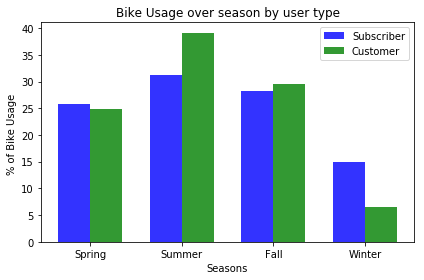

City: Chicago
Subscribers usage(spring/summer/fall/winter)(21.65, 38.55, 29.39, 10.41)
Consumer usage(spring/summer/fall/winter)(20.96, 50.69, 26.32, 2.04)


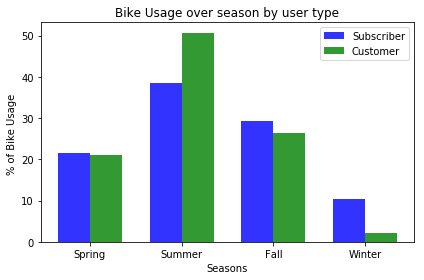

City: NYC
Subscribers usage(spring/summer/fall/winter)(22.49, 31.05, 31.95, 14.52)
Consumer usage(spring/summer/fall/winter)(25.58, 38.17, 30.48, 5.77)


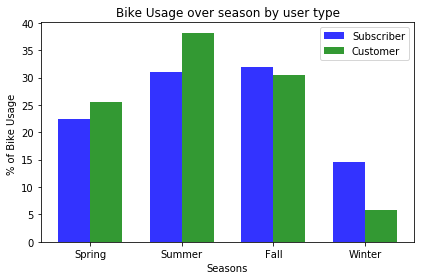

City: Bay Area
Subscribers usage(spring/summer/fall/winter)(25.1, 27.32, 26.86, 20.72)
Consumer usage(spring/summer/fall/winter)(27.33, 28.91, 28.59, 15.17)


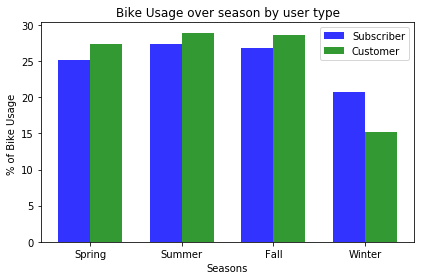

In [6]:
city_data_file = {'Washington':  './data/Washington-2016-Summary.csv',
                  'Chicago':'./data/Chicago-2016-Summary.csv',
                  'NYC': './data/NYC-2016-Summary.csv',
                  'Bay Area': './examples/BayArea-Y3-Summary.csv'}

for city, filename in city_data_file.items():
    print('City: {}'.format(city)) 
    #Obatin usage proportion for each season
    Subscriber_seasonal_ridership = number_of_seasonal_trips(filename,'Subscriber')
    Customer_seasonal_ridership = number_of_seasonal_trips(filename,'Customer')
    print ('Subscribers usage(spring/summer/fall/winter) %{}'.format(Subscriber_seasonal_ridership))
    print ('Consumer usage(spring/summer/fall/winter) %{}'.format(Customer_seasonal_ridership))
    # create plot
    index = np.arange(len(Subscriber_seasonal_ridership))
    bar_width = 0.35
    opacity = 0.8
    dim = bar_width / 2
 
    plt.bar(index, Subscriber_seasonal_ridership, bar_width, alpha=opacity, color='b', label='Subscriber')
 
    plt.bar(index + bar_width, Customer_seasonal_ridership, bar_width, alpha=opacity, color='g', label='Customer')
 
    plt.xlabel('Seasons')
    plt.ylabel('% of Bike Usage ')
    plt.title('Bike Usage over season by user type')
    plt.xticks(index+dim, ('Spring', 'Summer', 'Fall', 'Winter'))
    plt.legend()
 
    plt.tight_layout()
    plt.show()
   

A bar chart is used to display the proportion of ridership across seasons(Fall, Wineter, Spring and Summer) of a year for Subscriber and Customer. In all 3 cities Summer is popular time and Winter is when system is less likely used by both the rider types. Ridership of Customer exceeds Subscriber in Summer  but it is reversed in 
Winter where Subscriber ridership is higher than Customer. In Fall and Spring ridership remain fairly same or differ by 5% more less between Subscriber and Customer.


Resources
https://www.tutorialspoint.com/python/python_tuples.htm
https://www.programiz.com/python-programming/dictionary
https://docs.python.org/2/library/calendar.html
https://www.youtube.com/watch?v=in8LJ-aR8T8
https://matplotlib.org/devdocs/gallery/scales/log_bar.html#sphx-glr-gallery-scales-log-bar-py

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I would like to learn about trends in early childhood education using techniques of data science. How is education  viewed at early stage of childhood. Do parents prefer to start academic education at this stage or wait till they turn 5 ? Does parents background, ethinicity and other factors effect the decisions ? Other than regular academic style there are other education systems like Raggio and Waldrof that are coming to notice. How many schools are trying these new education system? Is there a growing trend for these types of schools? In order to learn about growing trends in early childhood education the data must be collected from schools and by conducting surveys.

I would like to known public transportation
In different cities across 

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.